### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

In [136]:
import pandas as pd 

cs_df = pd.read_csv('./datasets/customer_shopping_data.csv')
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [137]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [138]:
cs_df[['price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


In [139]:
cs_df.invoice_date = pd.to_datetime(cs_df.invoice_date, dayfirst=True)
cs_df.sort_values(['invoice_date'], ascending=False)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
386,I289611,C222906,Female,45,Clothing,3,900.24,Debit Card,2023-03-08,Cevahir AVM
20031,I271683,C180068,Male,55,Shoes,1,600.17,Credit Card,2023-03-08,Emaar Square Mall
65073,I312534,C235553,Female,68,Food & Beverage,5,26.15,Credit Card,2023-03-08,Emaar Square Mall
93825,I345170,C108141,Female,20,Food & Beverage,1,5.23,Credit Card,2023-03-08,Kanyon
76606,I254758,C178144,Female,51,Cosmetics,5,203.30,Cash,2023-03-08,Metropol AVM
...,...,...,...,...,...,...,...,...,...,...
65492,I224830,C254068,Female,30,Food & Beverage,3,15.69,Cash,2021-01-01,Metrocity
34180,I211131,C280473,Male,51,Cosmetics,2,81.32,Cash,2021-01-01,Istinye Park
36199,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
79607,I474975,C193810,Female,20,Clothing,2,600.16,Credit Card,2021-01-01,Metropol AVM


In [140]:
cs_df['Recency'] = pd.to_datetime(cs_df.invoice_date, dayfirst=True).apply(lambda x: (pd.to_datetime('2023-03-09') - x).days)

cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723


In [141]:
cs_df.drop('invoice_date', axis=1, inplace=True)
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,216
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,452
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,485
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,662
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,169
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,533
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,711
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,723


In [142]:
cs_df['Frequency'] = cs_df[['quantity']]
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency,Frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,216,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,452,3
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,485,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,662,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,501,4
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,169,5
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,533,2
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,711,2
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,723,4


In [143]:
cs_df['Monetary'] = cs_df['quantity'] * cs_df['price']
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency,Frequency,Monetary
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,216,5,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,452,3,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,485,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,662,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,501,4,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,169,5,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,533,2,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,711,2,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,723,4,16800.00


In [144]:
cs_df['payment_method'] = cs_df['payment_method'].replace({
    'Credit Card': 'Credit Card',
    'Debit Card': 'Credit Card',
    'Cash': 'Cash'})

cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency,Frequency,Monetary
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,216,5,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Credit Card,Forum Istanbul,452,3,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,485,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,662,5,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,501,4,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,169,5,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,533,2,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Credit Card,Metrocity,711,2,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,723,4,16800.00


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rfm_scaler = scaler.fit_transform(cs_df[['Recency', 'Frequency', 'Monetary']])
rfm_scaler_df = pd.DataFrame(rfm_scaler, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaler_df

,Recency,Frequency,Monetary
0,0.270101,1.00,0.285648
1,0.566583,0.50,0.205614
2,0.608040,0.00,0.011235
3,0.830402,1.00,0.571505
4,0.628141,0.75,0.009037
...,...,...,...
99452,0.211055,1.00,0.010974
99453,0.668342,0.25,0.000598
99454,0.891960,0.25,0.000598
99455,0.907035,0.75,0.639928


In [146]:
rfm_scaler_df['Recency'] = 1 - rfm_scaler_df['Recency']
rfm_scaler_df

,Recency,Frequency,Monetary
0,0.729899,1.00,0.285648
1,0.433417,0.50,0.205614
2,0.391960,0.00,0.011235
3,0.169598,1.00,0.571505
4,0.371859,0.75,0.009037
...,...,...,...
99452,0.788945,1.00,0.010974
99453,0.331658,0.25,0.000598
99454,0.108040,0.25,0.000598
99455,0.092965,0.75,0.639928


In [147]:
cs_df['total_score'] = rfm_scaler_df['Recency'] + rfm_scaler_df['Frequency'] + rfm_scaler_df['Monetary']
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency,Frequency,Monetary,total_score
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,216,5,7502.00,2.015548
1,I317333,C111565,Male,21,Shoes,3,1800.51,Credit Card,Forum Istanbul,452,3,5401.53,1.139031
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,485,1,300.08,0.403194
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,662,5,15004.25,1.741103
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,501,4,242.40,1.130896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,169,5,293.25,1.799919
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,533,2,20.92,0.582256
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Credit Card,Metrocity,711,2,20.92,0.358638
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,723,4,16800.00,1.482893


In [148]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cs_df['total_score'], [90,60,30,10])

def get_level(x):
    if x >= l1:
        return 1   # VVIP
    if x >= l2:
        return 2   # VIP
    if x >= l3:
        return 3   # Gold
    if x >= l4:
        return 4   # Silver
    return 5       # Bronze


In [149]:
cs_df['level'] = cs_df['total_score'].apply(get_level)

cs_df.drop(labels = ['Recency', 'Frequency', 'Monetary'], axis = 1, inplace=True)
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_score,level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2.015548,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Credit Card,Forum Istanbul,1.139031,3
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,0.403194,4
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,1.741103,2
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,1.130896,3
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,1.799919,2
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,0.582256,4
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Credit Card,Metrocity,0.358638,5
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,1.482893,2


In [152]:
cs_df['level'] = cs_df['level'].replace(
    [1,2,3,4,5],
    ['VVIP', 'VIP', 'Gold', 'Silver', 'Bronze']
)

cs_df


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_score,level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,2.015548,VVIP
1,I317333,C111565,Male,21,Shoes,3,1800.51,Credit Card,Forum Istanbul,1.139031,Gold
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,0.403194,Silver
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,1.741103,VIP
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,1.799919,VIP
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,0.582256,Silver
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Credit Card,Metrocity,0.358638,Bronze
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,1.482893,VIP


level
Gold      29845
VIP       29831
Silver    19886
VVIP       9952
Bronze     9943
Name: count, dtype: int64


/var/folders/rs/pmsg7qg54zqbpwk2zvchs6br0000gn/T/ipykernel_79712/3359258128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='level', data=cs_df, palette='muted', order=order)


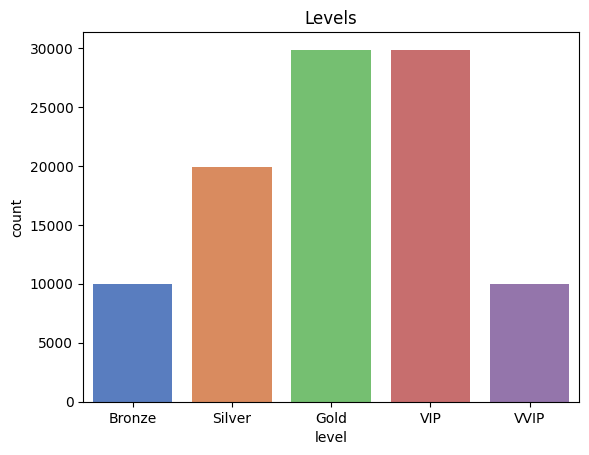

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'VIP', 'VVIP']

print(cs_df['level'].value_counts())

sns.countplot(x='level', data=cs_df, palette='muted', order=order)
plt.title('Levels')
plt.show()

/var/folders/rs/pmsg7qg54zqbpwk2zvchs6br0000gn/T/ipykernel_79712/3806359768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='shopping_mall', data=cs_df, palette='muted')


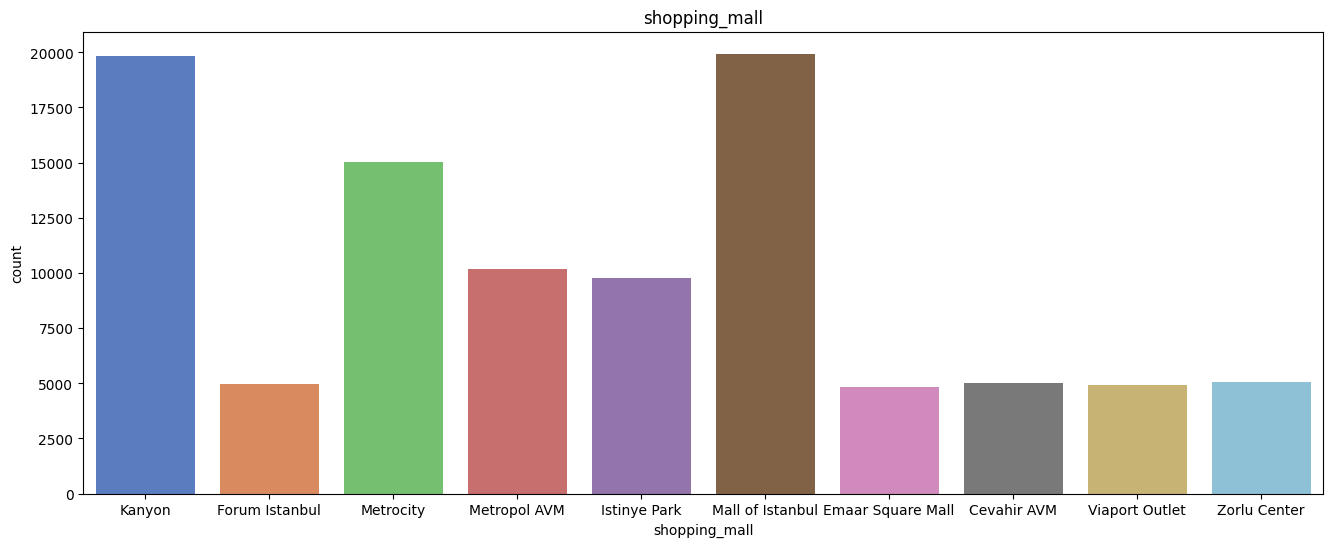

In [184]:
fig, axes = plt.subplots(1, figsize=(16, 6))
sns.countplot(x='shopping_mall', data=cs_df, palette='muted')
plt
plt.title('shopping_mall')
plt.show()

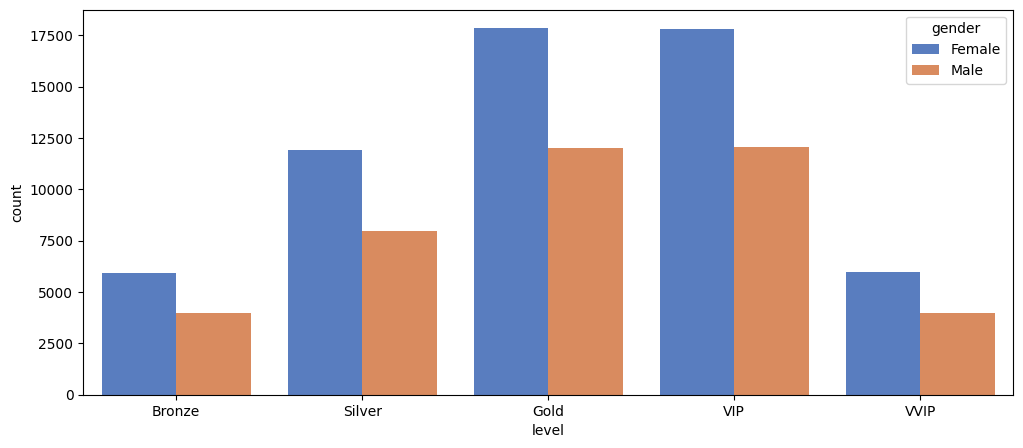

In [186]:
fig, axes = plt.subplots(1, figsize=(12, 5))

sns.countplot(data=cs_df, x='level', hue='gender', palette='muted', order=order)
plt.show()

### 마케팅 전략 
- 등급 마케팅

 
    등급(Bronze, Silver, Gold, VIP, VVIP)을 만들었을 때 중 Gold 등급과 VIP등급이 비중이 높다.
    등급들을 지정하고 등급별로 이벤트들을 준비해서 고객들의 만족도를 높여 고객들을 유지해야 한다.

- 집중 쇼핑몰 마케팅


    kanyon, mall of istanbul 두개의 쇼핑몰이 거래 수가 많아서 집중인 타켓 마케팅을 할 필요가 있다.
    다른 쇼핑몰들은 이벤트나 프로모션을 준비해 고객들이 더 많이 찾아올 수 있도록 마케팅 전략을 가져가야 한다.

- 여성타겟 마케팅

    전체적으로 여성 회원들이 쇼핑몰을 자주 방문하고 등급이 올라갈 수록 여성이 많은 것을 봐서 여성 회원들을 집중적으로 마케팅을 할 필요가 있다.
